<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.88333, random_state=42)

print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (7000, 28, 28), (7000,)
Validation set: (53000, 28, 28), (53000,)
Test set: (10000, 28, 28), (10000,)


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_valid, y_valid))


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4423 - loss: 1.6160 - val_accuracy: 0.8860 - val_loss: 0.4099
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8518 - loss: 0.5224 - val_accuracy: 0.9180 - val_loss: 0.2845
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8983 - loss: 0.3557 - val_accuracy: 0.9281 - val_loss: 0.2471
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9206 - loss: 0.2689 - val_accuracy: 0.9358 - val_loss: 0.2243
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9370 - loss: 0.2217 - val_accuracy: 0.9360 - val_loss: 0.2273
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9440 - loss: 0.1851 - val_accuracy: 0.9394 - val_loss: 0.2209
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9534 - loss: 0.1599 - val_accuracy: 0.9448 - val_loss: 0.2034
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9626 - loss: 0.1282 - val_acc

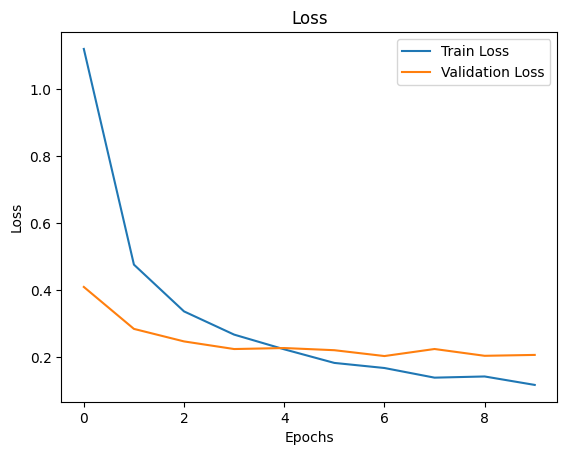

In [6]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9526 - loss: 0.1793


[0.17928174138069153, 0.9526000022888184]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


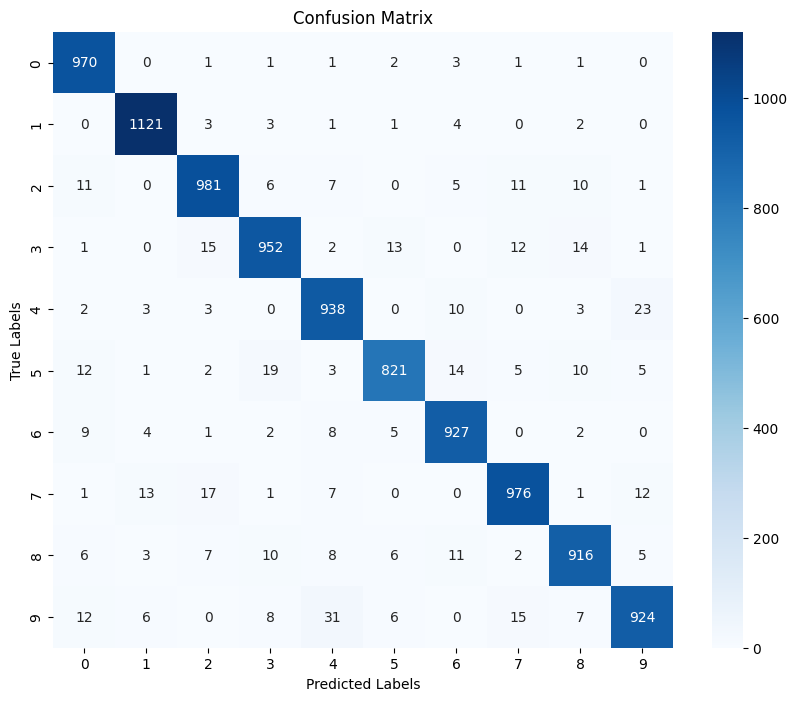

In [8]:
# prompt: how to get predictions from my model and draw a confusion matrix?

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
